# Capital Asset Pricing Model

Il CAPM è un modello finanziario secondo il quale il rendimento atteso di un asset è dato dal rendimento dell'asset privo di rischio sommato a beta che moltiplica il market risk premium.

$$E(R_i) = R_f + \beta_i(E(R_m) - R_f)$$


$R_f$ : è il rendimento di un asset privo di rischio, ad esempio il tasso d'interesse dei bound tedeschi. 

$\beta_i$: è il coefficiente che misura il rischio sistematico di un asset, nonchè quella componente del rischio non diversificabile. Esso misura la variazione attesa del rendimento del titolo per ogni variazione di un punto percentuale del rendimento di mercato.

$(E(R_m) - R_f)$: è il Market Risk Premium, ovvero una misura del premio che gli investitori richiedono per assumersi il rischio di investire nel mercato azionario, rispetto ad investire in un asset privo di rischio.

In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
tickers = ['^GSPC', 'AMZN', '^IRX']
start_date = "2020-01-01"
end_date = "2022-10-27"

data = yf.download(tickers, start=start_date, end=end_date, adjusted=True)['Adj Close']
data

[*********************100%***********************]  3 of 3 completed


,AMZN,^GSPC,^IRX
Date,,,
2020-01-02,94.900497,3257.850098,1.495
2020-01-03,93.748497,3234.850098,1.473
2020-01-06,95.143997,3246.280029,1.488
2020-01-07,95.343002,3237.179932,1.500
2020-01-08,94.598503,3253.050049,1.493
...,...,...,...
2022-10-20,115.250000,3665.780029,3.890
2022-10-21,119.320000,3752.750000,3.885
2022-10-24,119.820000,3797.340088,3.913


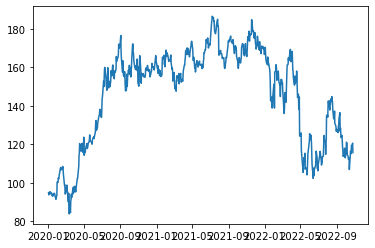

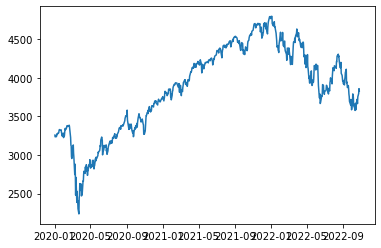

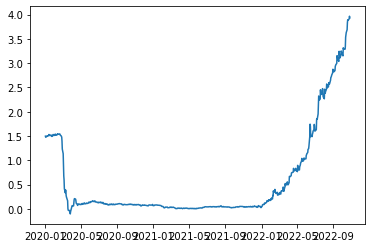

In [5]:
for col in data.columns:
    plt.plot(data[col], label=col)
    plt.show()

In [6]:
#Calcolo dei rendimenti dalle serie storiche dei prezzi
gspc_daily_return = data.iloc[:,1].pct_change().dropna()
amzn_daily_return = data.iloc[:, 0].pct_change().dropna()
irx_daily_return = data.iloc[:, 2].pct_change().dropna()

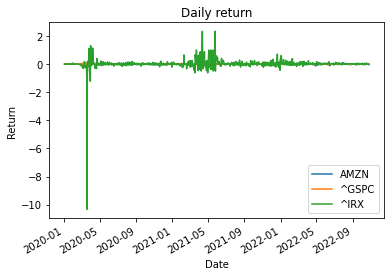

In [7]:
amzn_daily_return.plot()
gspc_daily_return.plot()
irx_daily_return.plot()
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Daily return")
plt.legend()
plt.show()

Un altro modo per rappresentare il CAPM è esplicitando la differenza tra il rendimento dell'asset con il tasso d'interesse risk free, ovvero $E(R_i) - R_f = \beta_i(E(R_m) - R_f)$ In questo modo è possibile regredire la differenza tra rendemento dell'asset e tasso risk free con il Market Risk Premium.

In [8]:
examzn = amzn_daily_return - irx_daily_return
exgspc = gspc_daily_return - irx_daily_return

In [9]:
exgspc = sm.add_constant(exgspc)
exgspc.columns=['const', 'Ex-return ^GSPC']
model = sm.OLS(examzn, exgspc)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.380e+05
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:41:26   Log-Likelihood:                 1835.1
No. Observations:                 710   AIC:                            -3666.
Df Residuals:                     708   BIC:                            -3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.001     

Sulla base dei risultati della regressione, è possibile verificare come il CAPM calcolato per il titolo Amazon è: $E(R_i) - R_f = 1,002*(E(R_m) - R_f)$, Quindi il beta del titolo Amazon rispetto all' SP500 è risultato pari a 1,002